In [310]:
import matplotlib.pyplot as plt

In [318]:
def func1(x1,x,v):  ## first particle
  dx=(x-x1)-L
  a = -k*dx/m
  v+=a*dt
  x+=v*dt
  return x,v

def func2(x1,x,x2,v):  ## else particle
  dx=2*x-(x1+x2)
  a = -k*dx/m
  v+=a*dt
  x+=v*dt
  return x,v

In [319]:
m=10    # mass of the particle
t=0.0   
L=10    # default lenghth of the spring
k=0.5   # spring const
x0=10   # first step
tlist=[0]
data=[] # (numbers of particle, list of (x,v)) 

for i in range(10):
  data.append([])
  for j in range(2):
    data[i].append([])
  data[i][0].append((i+1)*10)
  data[i][1].append(0)
data[9][0][0]+=x0

In [320]:
data

[[[10], [0]],
 [[20], [0]],
 [[30], [0]],
 [[40], [0]],
 [[50], [0]],
 [[60], [0]],
 [[70], [0]],
 [[80], [0]],
 [[90], [0]],
 [[110], [0]]]

In [321]:
dt=0.1
A,B=0,0
for i in range(10000):
  t=t+dt
  tlist.append(t)
  A,B=func1(data[8][0][-1],data[9][0][-1],data[9][1][-1])   ## first particle (number 10)
  data[9][0].append(A)
  data[9][1].append(B)
  for j in range(9):
    if j!=8:
      A,B=func2(data[7-j][0][-1],data[8-j][0][-1],data[9-j][0][-1],data[8-j][1][-1])  ## middle particles
      data[8-j][0].append(A)
      data[8-j][1].append(B)
    else:
      A,B=func2(0,data[8-j][0][-1],data[9-j][0][-1],data[8-j][1][-1])  ## last particle (number 1)
      data[0][0].append(A)
      data[0][1].append(B)
  

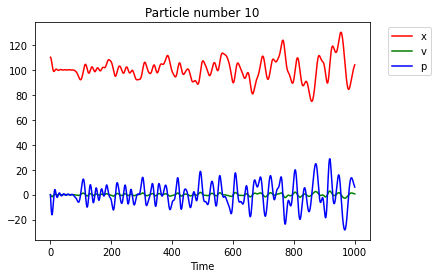

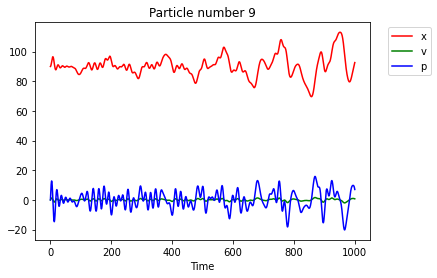

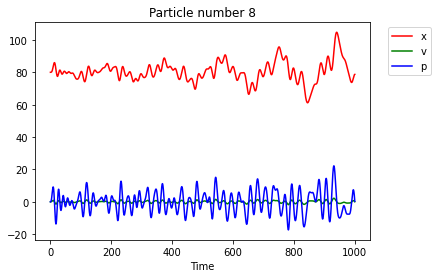

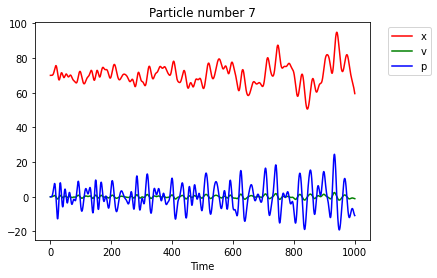

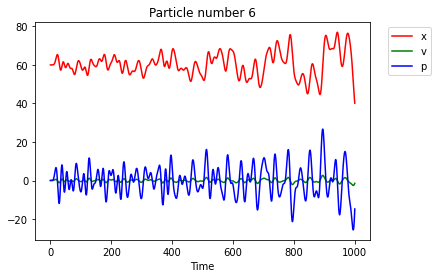

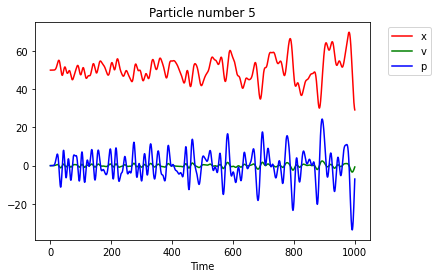

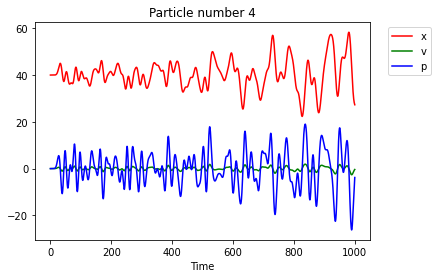

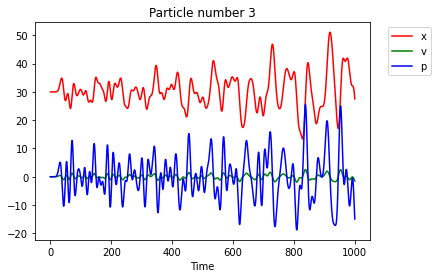

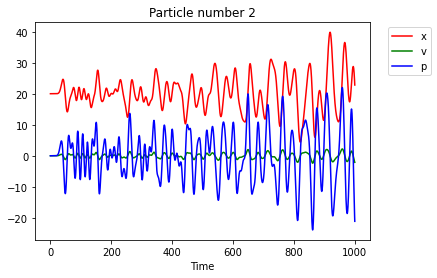

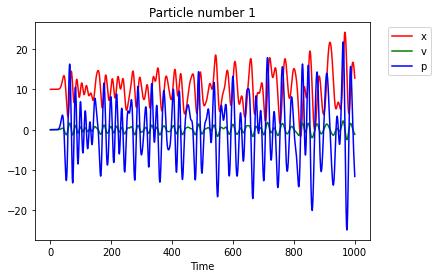

In [322]:
for i in range(10):
  plt.title('Particle number {}'.format(10-i))
  plt.plot(tlist,data[9-i][0],'r',label='x')
  plt.plot(tlist,data[9-i][1],'g',label='v')
  plt.plot(tlist,list(map(lambda x:m*x,data[9-i][1])),'b',label='p')
  plt.legend(bbox_to_anchor=(1.04,1))
  plt.xlabel('Time')
  plt.show()